### **Librarys**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define file paths for datasets
file_path_men = '/content/drive/MyDrive/Defense help/Tushar/Men Team.xlsx'
file_path_women = '/content/drive/MyDrive/Defense help/Tushar/Women Team.xlsx'

In [ ]:
# Load datasets into pandas DataFrames
df_men = pd.read_excel(file_path_men)
df_women = pd.read_excel(file_path_women)

In [ ]:
# Print first 5 rows and columns of each dataset
print("Men's Team Dataset:")
print(df_men.head())
print("\nWomen's Team Dataset:")
print(df_women.head())


Men's Team Dataset:
   Team Rank  Team Name  Total Points  Previous Points  Winning Streaks(+/-)
0          1  Argentina       1851.41          1843.73                  7.68
1          2     France       1840.76          1843.54                 -2.78
2          3     Brazil       1837.61          1828.27                  9.34
3          4    England       1794.34          1797.39                 -3.05
4          5    Belgium       1792.64          1788.55                  4.09

Women's Team Dataset:
   Team Rank Team Name  Total Points  Previous Points  Winning Streaks(+/-)
0          1    Sweden       2069.17          2049.71                 19.46
1          2     Spain       2051.84          2002.28                 49.56
2          3       USA       2051.21          2090.03                -38.82
3          4   England       2030.14          2040.76                -10.62
4          5    France       2004.17          2026.65                -22.48


In [ ]:
# Print attributes of each dataset
print("\nAttributes of Men's Team Dataset:")
print(df_men.columns.tolist())
print("\nAttributes of Women's Team Dataset:")
print(df_women.columns.tolist())


Attributes of Men's Team Dataset:
['Team Rank', 'Team Name', 'Total Points', 'Previous Points', 'Winning Streaks(+/-)']

Attributes of Women's Team Dataset:
['Team Rank', 'Team Name', 'Total Points', 'Previous Points', 'Winning Streaks(+/-)']


In [ ]:
# Print number of attributes and rows for each dataset
print("\nNumber of Attributes and Rows:")
print(f"Men's Team Dataset - Attributes: {len(df_men.columns)}, Rows: {len(df_men)}")
print(f"Women's Team Dataset - Attributes: {len(df_women.columns)}, Rows: {len(df_women)}")



Number of Attributes and Rows:
Men's Team Dataset - Attributes: 5, Rows: 207
Women's Team Dataset - Attributes: 5, Rows: 186


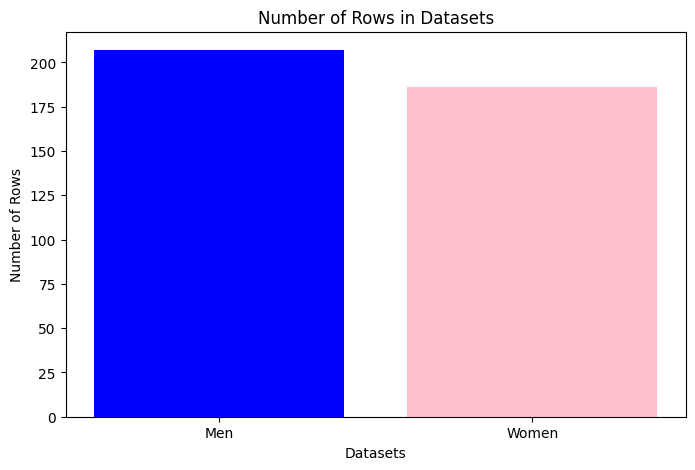

In [ ]:
# Visualization of rows for both datasets
plt.figure(figsize=(8, 5))
plt.bar(['Men', 'Women'], [len(df_men), len(df_women)], color=['blue', 'pink'])
plt.title('Number of Rows in Datasets')
plt.xlabel('Datasets')
plt.ylabel('Number of Rows')
plt.show()


In [ ]:
# Print non-null value counts and data types for each attribute in both datasets
print("\nNon-null Value Counts and Data Types:")
print("Men's Team Dataset:")
print(df_men.info())
print("\nWomen's Team Dataset:")
print(df_women.info())



Non-null Value Counts and Data Types:
Men's Team Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team Rank             207 non-null    int64  
 1   Team Name             207 non-null    object 
 2   Total Points          207 non-null    float64
 3   Previous Points       207 non-null    float64
 4   Winning Streaks(+/-)  207 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.2+ KB
None

Women's Team Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team Rank             186 non-null    int64  
 1   Team Name             186 non-null    object 
 2   Total Points          186 non-null    float64
 3   Previous Points       186 

In [ ]:
# Check for missing values
print("\nMissing Values:")
print("Men's Team Dataset:")
print(df_men.isnull().sum())
print("\nWomen's Team Dataset:")
print(df_women.isnull().sum())


Missing Values:
Men's Team Dataset:
Team Rank               0
Team Name               0
Total Points            0
Previous Points         0
Winning Streaks(+/-)    0
dtype: int64

Women's Team Dataset:
Team Rank               0
Team Name               0
Total Points            0
Previous Points         0
Winning Streaks(+/-)    0
dtype: int64


# **Universal Calculation Method**

In [ ]:
# Function for calculation based on the formula
def calculate_score(team1_value, team2_value):
    # Scoring weights for each attribute
    weights = {'Team Rank': 30, 'Total Points': 25, 'Previous Points': 25, 'Winning Streaks(+/−)': 20}

    # Initialize total score
    total_score_team1 = 0
    total_score_team2 = 0

    # Calculate score for each attribute
    total_score_team1 += weights['Team Rank'] if team1_value['Team Rank'] < team2_value['Team Rank'] else 0
    total_score_team2 += weights['Team Rank'] if team2_value['Team Rank'] < team1_value['Team Rank'] else 0

    total_score_team1 += weights['Total Points'] if team1_value['Total Points'] > team2_value['Total Points'] else 0
    total_score_team2 += weights['Total Points'] if team2_value['Total Points'] > team1_value['Total Points'] else 0

    total_score_team1 += weights['Previous Points'] if team1_value['Previous Points'] > team2_value['Previous Points'] else 0
    total_score_team2 += weights['Previous Points'] if team2_value['Previous Points'] > team1_value['Previous Points'] else 0

    total_score_team1 += weights['Winning Streaks(+/−)'] if team1_value['Winning Streaks(+/−)'] > team2_value['Winning Streaks(+/−)'] else 0
    total_score_team2 += weights['Winning Streaks(+/−)'] if team2_value['Winning Streaks(+/−)'] > team1_value['Winning Streaks(+/−)'] else 0

    return total_score_team1, total_score_team2

In [ ]:
def predict_winner(team1, team2):
    # Calculate scores
    score_team1, score_team2 = calculate_score(team1, team2)

    # Total score
    total_score = score_team1 + score_team2

    # Calculate winning percentage
    winning_percentage_team1 = (score_team1 / total_score) * 100
    winning_percentage_team2 = (score_team2 / total_score) * 100

    # Determine winning team
    winner = 'Team 1' if score_team1 > score_team2 else 'Team 2' if score_team2 > score_team1 else 'Tie'

    # Print results
    print(f"Winning Team: {winner}")
    print(f"Winning Percentage of Team 1: {winning_percentage_team1:.2f}%")
    print(f"Winning Percentage of Team 2: {winning_percentage_team2:.2f}%")

In [ ]:
# Example usage
team1 = {'Team Rank': 2, 'Total Points': 290, 'Previous Points': 300, 'Winning Streaks(+/−)': 7.9}
team2 = {'Team Rank': 1, 'Total Points': 280, 'Previous Points': 320, 'Winning Streaks(+/−)': 4.3}

predict_winner(team1, team2)

Winning Team: Team 2
Winning Percentage of Team 1: 45.00%
Winning Percentage of Team 2: 55.00%


In [ ]:
# Define the function for scoring based on the formula
def calculate_score(team1_value, team2_value):
    weights = {'Team Rank': 30, 'Total Points': 25, 'Previous Points': 25, 'Winning Streaks(+/−)': 20}

    total_score_team1 = 0
    total_score_team2 = 0

    for attribute in weights:
        if team1_value[attribute] > team2_value[attribute]:
            total_score_team1 += weights[attribute]
        elif team1_value[attribute] < team2_value[attribute]:
            total_score_team2 += weights[attribute]

    return total_score_team1, total_score_team2

In [ ]:
# Define the function for predicting the winner
def predict_winner(team1, team2):
    score_team1, score_team2 = calculate_score(team1, team2)
    total_score = score_team1 + score_team2

    # Calculate winning percentage
    winning_percentage_team1 = (score_team1 / total_score) * 100
    winning_percentage_team2 = (score_team2 / total_score) * 100

    # Determine winning team
    winner = 'Team 1' if score_team1 > score_team2 else 'Team 2' if score_team2 > score_team1 else 'Tie'

    return winner, winning_percentage_team1, winning_percentage_team2

In [ ]:
# Function for calculation based on the formula
def calculate_score(team1_value, team2_value):
    # Scoring weights for each attribute
    weights = {'Team Rank': 30, 'Total Points': 25, 'Previous Points': 25, 'Winning Streaks(+/−)': 20}

    # Initialize total score
    total_score_team1 = 0
    total_score_team2 = 0

    # Calculate score for each attribute
    total_score_team1 += weights['Team Rank'] if team1_value['Team Rank'] < team2_value['Team Rank'] else 0
    total_score_team2 += weights['Team Rank'] if team2_value['Team Rank'] < team1_value['Team Rank'] else 0

    total_score_team1 += weights['Total Points'] if team1_value['Total Points'] > team2_value['Total Points'] else 0
    total_score_team2 += weights['Total Points'] if team2_value['Total Points'] > team1_value['Total Points'] else 0

    total_score_team1 += weights['Previous Points'] if team1_value['Previous Points'] > team2_value['Previous Points'] else 0
    total_score_team2 += weights['Previous Points'] if team2_value['Previous Points'] > team1_value['Previous Points'] else 0

    total_score_team1 += weights['Winning Streaks(+/−)'] if team1_value['Winning Streaks(+/−)'] > team2_value['Winning Streaks(+/−)'] else 0
    total_score_team2 += weights['Winning Streaks(+/−)'] if team2_value['Winning Streaks(+/−)'] > team1_value['Winning Streaks(+/−)'] else 0

    # Calculate winning percentages
    total_score = total_score_team1 + total_score_team2
    winning_percentage_team1 = (total_score_team1 / total_score) * 100
    winning_percentage_team2 = (total_score_team2 / total_score) * 100

    return total_score_team1, total_score_team2, winning_percentage_team1, winning_percentage_team2


In [ ]:
# Function to calculate winning percentages
def calculate_winning_percentages(dataset):
    dataset['Team1_Percentage'] = (dataset['Total Points'] / (dataset['Total Points'] + dataset['Previous Points'])) * 100
    dataset['Team2_Percentage'] = 100 - dataset['Team1_Percentage']

# Function to determine the winner and add a 'Winner' column
def determine_winner(dataset):
    dataset['Winner'] = 'Team 1'
    dataset.loc[dataset['Team2_Percentage'] > dataset['Team1_Percentage'], 'Winner'] = 'Team 2'
    dataset.loc[dataset['Team1_Percentage'] == dataset['Team2_Percentage'], 'Winner'] = 'Equal Chance'

# Load datasets into pandas DataFrames
df_men = pd.read_excel('/content/drive/MyDrive/Defense help/Tushar/Men Team.xlsx')
df_women = pd.read_excel('/content/drive/MyDrive/Defense help/Tushar/Women Team.xlsx')

# Calculate winning percentages for both Men and Women datasets
calculate_winning_percentages(df_men)
calculate_winning_percentages(df_women)

# Determine the winner for both Men and Women datasets
determine_winner(df_men)
determine_winner(df_women)

# Print first 5 rows of each dataset to verify the changes
print("Men's Team Dataset:")
print(df_men.head())

print("\nWomen's Team Dataset:")
print(df_women.head())


Men's Team Dataset:
   Team Rank  Team Name  Total Points  Previous Points  Winning Streaks(+/-)  \
0          1  Argentina       1851.41          1843.73                  7.68   
1          2     France       1840.76          1843.54                 -2.78   
2          3     Brazil       1837.61          1828.27                  9.34   
3          4    England       1794.34          1797.39                 -3.05   
4          5    Belgium       1792.64          1788.55                  4.09   

   Team1_Percentage  Team2_Percentage  Winner  
0         50.103920         49.896080  Team 1  
1         49.962272         50.037728  Team 2  
2         50.127391         49.872609  Team 1  
3         49.957541         50.042459  Team 2  
4         50.057104         49.942896  Team 1  

Women's Team Dataset:
   Team Rank Team Name  Total Points  Previous Points  Winning Streaks(+/-)  \
0          1    Sweden       2069.17          2049.71                 19.46   
1          2     Spain       2

# **Train 70% and Test 30%**

In [ ]:
# Train-test split for Men's Team Dataset
X_men = df_men[['Team1_Percentage', 'Team2_Percentage']]
y_men = df_men['Winner']

X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.3, random_state=42)

# Train-test split for Women's Team Dataset
X_women = df_women[['Team1_Percentage', 'Team2_Percentage']]
y_women = df_women['Winner']

X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.3, random_state=42)


# **Confusion Matrix Visual Ploting**

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, classes):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# **Initializing Algorithm**

In [ ]:
# Define a function for training and evaluating the models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, class_report, conf_matrix


In [ ]:
# Initialize models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
knn_model = KNeighborsClassifier()

In [ ]:
# Train and evaluate models for Men's Team Dataset
print("Results for Men's Team Dataset:")
accuracy_logreg_men, class_report_logreg_men, conf_matrix_logreg_men = train_evaluate_model(logreg_model, X_train_men, y_train_men, X_test_men, y_test_men)
accuracy_dt_men, class_report_dt_men, conf_matrix_dt_men = train_evaluate_model(dt_model, X_train_men, y_train_men, X_test_men, y_test_men)
accuracy_rf_men, class_report_rf_men, conf_matrix_rf_men = train_evaluate_model(rf_model, X_train_men, y_train_men, X_test_men, y_test_men)
accuracy_gb_men, class_report_gb_men, conf_matrix_gb_men = train_evaluate_model(gb_model, X_train_men, y_train_men, X_test_men, y_test_men)
accuracy_knn_men, class_report_knn_men, conf_matrix_knn_men = train_evaluate_model(knn_model, X_train_men, y_train_men, X_test_men, y_test_men)

# Train and evaluate models for Women's Team Dataset
print("\nResults for Women's Team Dataset:")
accuracy_logreg_women, class_report_logreg_women, conf_matrix_logreg_women = train_evaluate_model(logreg_model, X_train_women, y_train_women, X_test_women, y_test_women)
accuracy_dt_women, class_report_dt_women, conf_matrix_dt_women = train_evaluate_model(dt_model, X_train_women, y_train_women, X_test_women, y_test_women)
accuracy_rf_women, class_report_rf_women, conf_matrix_rf_women = train_evaluate_model(rf_model, X_train_women, y_train_women, X_test_women, y_test_women)
accuracy_gb_women, class_report_gb_women, conf_matrix_gb_women = train_evaluate_model(gb_model, X_train_women, y_train_women, X_test_women, y_test_women)
accuracy_knn_women, class_report_knn_women, conf_matrix_knn_women = train_evaluate_model(knn_model, X_train_women, y_train_women, X_test_women, y_test_women)


Results for Men's Team Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results for Women's Team Dataset:


In [ ]:
# Update the visualization of accuracies for all classifiers
men_accuracies = [
    accuracy_logreg_men,
    accuracy_dt_men,
    accuracy_rf_men,
    accuracy_gb_men,
    accuracy_knn_men
]

women_accuracies = [
    accuracy_logreg_women,
    accuracy_dt_women,
    accuracy_rf_women,
    accuracy_gb_women,
    accuracy_knn_women
]

classifier_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'K-Nearest Neighbors'
]


# **Logistic Regression**


Logistic Regression - Men's Team Dataset:
Accuracy: 0.746031746031746
Classification Report:
               precision    recall  f1-score   support

      Team 1       0.59      1.00      0.74        23
      Team 2       1.00      0.96      0.98        25
         Tie       0.00      0.00      0.00        15

    accuracy                           0.75        63
   macro avg       0.53      0.65      0.57        63
weighted avg       0.61      0.75      0.66        63

Confusion Matrix:
 [[23  0  0]
 [ 1 24  0]
 [15  0  0]]


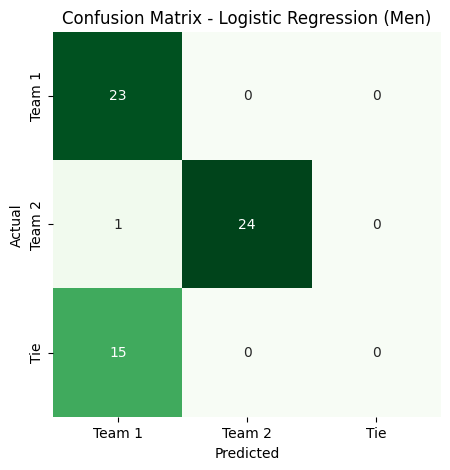

In [ ]:
# Print results with confusion matrix plot
print("\nLogistic Regression - Men's Team Dataset:")
print(f"Accuracy: {accuracy_logreg_men}")
print("Classification Report:\n", class_report_logreg_men)
print("Confusion Matrix:\n", conf_matrix_logreg_men)


# Plot confusion matrix for Men's Team Dataset
plot_confusion_matrix(conf_matrix_logreg_men, 'Confusion Matrix - Logistic Regression (Men)', ['Team 1', 'Team 2', 'Tie'])



Logistic Regression - Women's Team Dataset:
Accuracy: 0.6785714285714286
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      0.27      0.43        11
      Team 2       1.00      0.47      0.64        19
         Tie       0.59      1.00      0.74        26

    accuracy                           0.68        56
   macro avg       0.86      0.58      0.60        56
weighted avg       0.81      0.68      0.65        56

Confusion Matrix:
 [[ 3  0  8]
 [ 0  9 10]
 [ 0  0 26]]


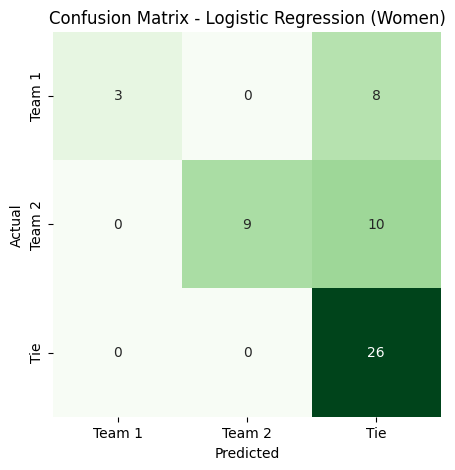

In [ ]:
# Print results with confusion matrix plot for Women's Team Dataset
print("\nLogistic Regression - Women's Team Dataset:")
print(f"Accuracy: {accuracy_logreg_women}")
print("Classification Report:\n", class_report_logreg_women)
print("Confusion Matrix:\n", conf_matrix_logreg_women)

# Plot confusion matrix for Women's Team Dataset
plot_confusion_matrix(conf_matrix_logreg_women, 'Confusion Matrix - Logistic Regression (Women)', ['Team 1', 'Team 2', 'Tie'])

# **Decision Tree**


Decision Tree - Men's Team Dataset:
Accuracy: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        23
      Team 2       1.00      0.96      0.98        25
         Tie       0.94      1.00      0.97        15

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63

Confusion Matrix:
 [[23  0  0]
 [ 0 24  1]
 [ 0  0 15]]


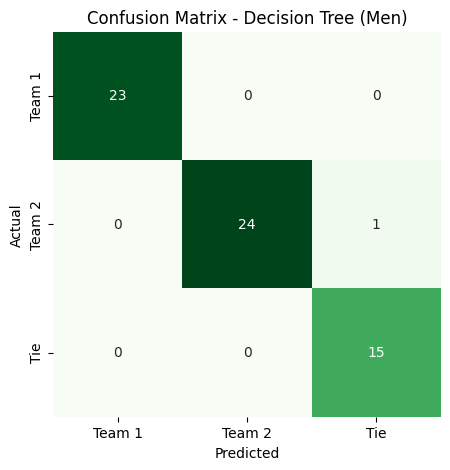

In [ ]:
# Print results with confusion matrix plot for Men's Team Dataset
print("\nDecision Tree - Men's Team Dataset:")
print(f"Accuracy: {accuracy_dt_men}")
print("Classification Report:\n", class_report_dt_men)
print("Confusion Matrix:\n", conf_matrix_dt_men)

# Plot confusion matrix for Men's Team Dataset
plot_confusion_matrix(conf_matrix_dt_men, 'Confusion Matrix - Decision Tree (Men)', ['Team 1', 'Team 2', 'Tie'])



Decision Tree - Women's Team Dataset:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        11
      Team 2       1.00      1.00      1.00        19
         Tie       1.00      1.00      1.00        26

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Confusion Matrix:
 [[11  0  0]
 [ 0 19  0]
 [ 0  0 26]]


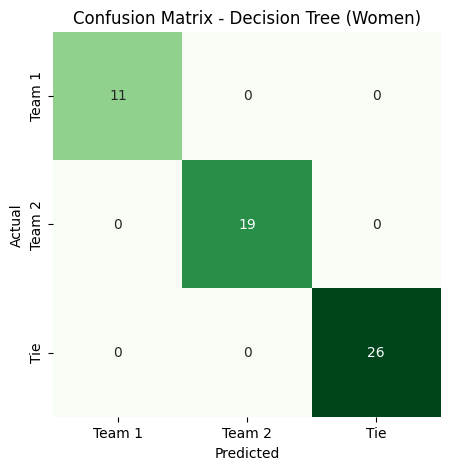

In [ ]:
# Print results with confusion matrix plot for Women's Team Dataset
print("\nDecision Tree - Women's Team Dataset:")
print(f"Accuracy: {accuracy_dt_women}")
print("Classification Report:\n", class_report_dt_women)
print("Confusion Matrix:\n", conf_matrix_dt_women)

# Plot confusion matrix for Women's Team Dataset
plot_confusion_matrix(conf_matrix_dt_women, 'Confusion Matrix - Decision Tree (Women)', ['Team 1', 'Team 2', 'Tie'])

# **Random Forest**

In [ ]:
# Train and evaluate models for Men's Team Dataset - RandomForestClassifier
print("\nRandom Forest - Men's Team Dataset:")
accuracy_rf_men, class_report_rf_men, conf_matrix_rf_men = train_evaluate_model(rf_model, X_train_men, y_train_men, X_test_men, y_test_men)



Random Forest - Men's Team Dataset:



Random Forest (Men)s Team Dataset:
Accuracy: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        23
      Team 2       1.00      0.96      0.98        25
         Tie       0.94      1.00      0.97        15

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63

Confusion Matrix:
 [[23  0  0]
 [ 0 24  1]
 [ 0  0 15]]


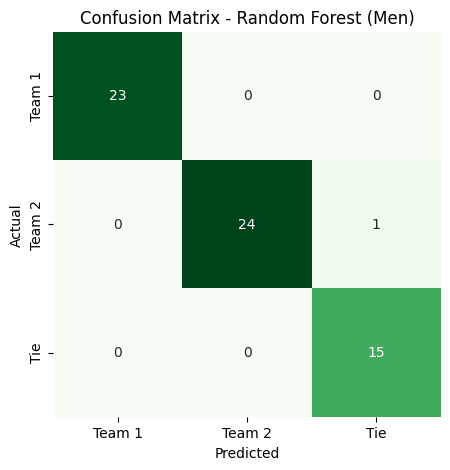

In [ ]:
# Print results
print("\nRandom Forest (Men)s Team Dataset:")
print(f"Accuracy: {accuracy_rf_men}")
print("Classification Report:\n", class_report_rf_men)
print("Confusion Matrix:\n", conf_matrix_rf_men)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix_rf_men, 'Confusion Matrix - Random Forest (Men)', ['Team 1', 'Team 2', 'Tie'])


In [ ]:
# Train and evaluate models for Women's Team Dataset - RandomForestClassifier
print("\nRandom Forest - Women's Team Dataset:")
accuracy_rf_women, class_report_rf_women, conf_matrix_rf_women = train_evaluate_model(rf_model, X_train_women, y_train_women, X_test_women, y_test_women)



Random Forest - Women's Team Dataset:



Random Forest (Women)s Team Dataset:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        11
      Team 2       1.00      1.00      1.00        19
         Tie       1.00      1.00      1.00        26

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Confusion Matrix:
 [[11  0  0]
 [ 0 19  0]
 [ 0  0 26]]


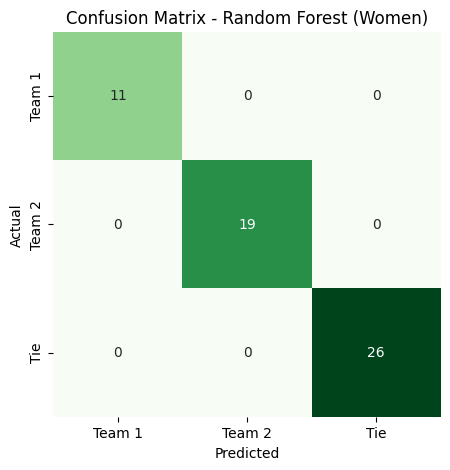

In [ ]:
# Print results
print("\nRandom Forest (Women)s Team Dataset:")
print(f"Accuracy: {accuracy_rf_women}")
print("Classification Report:\n", class_report_rf_women)
print("Confusion Matrix:\n", conf_matrix_rf_women)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix_rf_women, 'Confusion Matrix - Random Forest (Women)', ['Team 1', 'Team 2', 'Tie'])

# ***Gradient Boosting***


Gradient Boosting - Men's Team Dataset:
Accuracy: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        23
      Team 2       1.00      0.96      0.98        25
         Tie       0.94      1.00      0.97        15

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63

Confusion Matrix:
 [[23  0  0]
 [ 0 24  1]
 [ 0  0 15]]


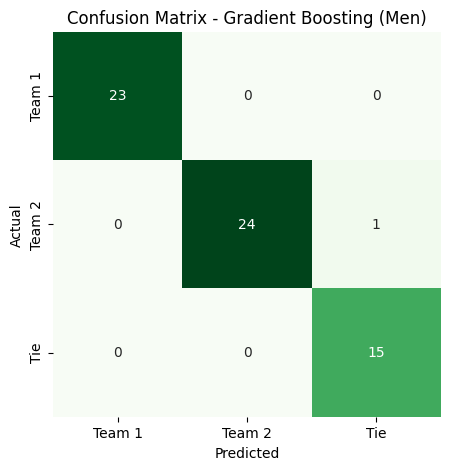

In [ ]:
# Train and evaluate models for Men's Team Dataset - GradientBoostingClassifier
print("\nGradient Boosting - Men's Team Dataset:")
accuracy_gb_men, class_report_gb_men, conf_matrix_gb_men = train_evaluate_model(gb_model, X_train_men, y_train_men, X_test_men, y_test_men)

# Print results
print(f"Accuracy: {accuracy_gb_men}")
print("Classification Report:\n", class_report_gb_men)
print("Confusion Matrix:\n", conf_matrix_gb_men)
# Plot confusion matrix
plot_confusion_matrix(conf_matrix_gb_men, 'Confusion Matrix - Gradient Boosting (Men)', ['Team 1', 'Team 2', 'Tie'])



Gradient Boosting - Women's Team Dataset:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        11
      Team 2       1.00      1.00      1.00        19
         Tie       1.00      1.00      1.00        26

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

Confusion Matrix:
 [[11  0  0]
 [ 0 19  0]
 [ 0  0 26]]


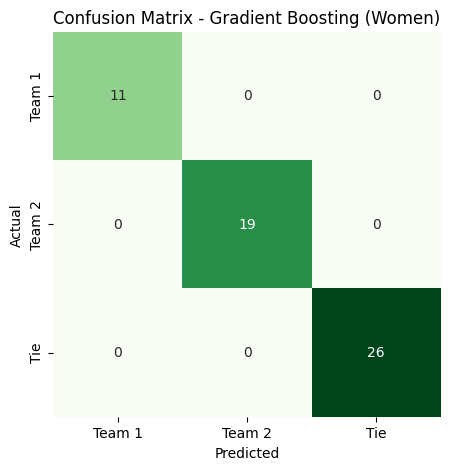

In [ ]:
# Train and evaluate models for Women's Team Dataset - GradientBoostingClassifier
print("\nGradient Boosting - Women's Team Dataset:")
accuracy_gb_women, class_report_gb_women, conf_matrix_gb_women = train_evaluate_model(gb_model, X_train_women, y_train_women, X_test_women, y_test_women)

# Print results
print(f"Accuracy: {accuracy_gb_women}")
print("Classification Report:\n", class_report_gb_women)
print("Confusion Matrix:\n", conf_matrix_gb_women)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix_gb_women, 'Confusion Matrix - Gradient Boosting (Women)', ['Team 1', 'Team 2', 'Tie'])


# **K-Nearest Neighbors**


K-Nearest Neighbors - Men's Team Dataset:
Accuracy: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      1.00      1.00        23
      Team 2       1.00      0.96      0.98        25
         Tie       0.94      1.00      0.97        15

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63

Confusion Matrix:
 [[23  0  0]
 [ 0 24  1]
 [ 0  0 15]]


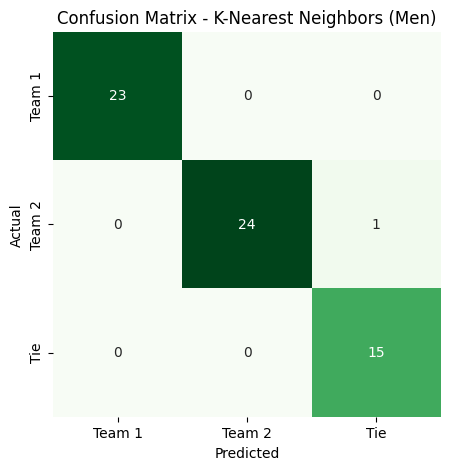

In [ ]:
# Train and evaluate models for Men's Team Dataset - KNeighborsClassifier
print("\nK-Nearest Neighbors - Men's Team Dataset:")
accuracy_knn_men, class_report_knn_men, conf_matrix_knn_men = train_evaluate_model(knn_model, X_train_men, y_train_men, X_test_men, y_test_men)

# Print results
print(f"Accuracy: {accuracy_knn_men}")
print("Classification Report:\n", class_report_knn_men)
print("Confusion Matrix:\n", conf_matrix_knn_men)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix_knn_men, 'Confusion Matrix - K-Nearest Neighbors (Men)', ['Team 1', 'Team 2', 'Tie'])



K-Nearest Neighbors - Women's Team Dataset:
Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

      Team 1       1.00      0.91      0.95        11
      Team 2       1.00      0.95      0.97        19
         Tie       0.93      1.00      0.96        26

    accuracy                           0.96        56
   macro avg       0.98      0.95      0.96        56
weighted avg       0.97      0.96      0.96        56

Confusion Matrix:
 [[10  0  1]
 [ 0 18  1]
 [ 0  0 26]]


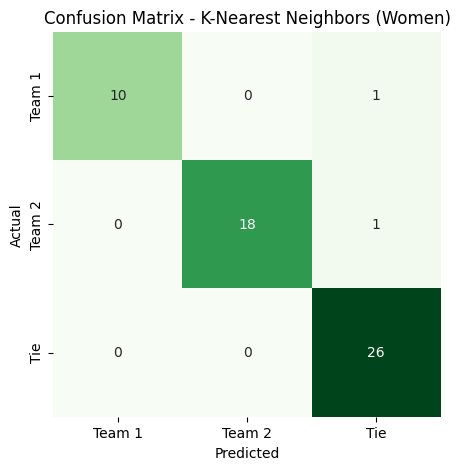

In [ ]:
# Train and evaluate models for Women's Team Dataset - KNeighborsClassifier
print("\nK-Nearest Neighbors - Women's Team Dataset:")
accuracy_knn_women, class_report_knn_women, conf_matrix_knn_women = train_evaluate_model(knn_model, X_train_women, y_train_women, X_test_women, y_test_women)

# Print results
print(f"Accuracy: {accuracy_knn_women}")
print("Classification Report:\n", class_report_knn_women)
print("Confusion Matrix:\n", conf_matrix_knn_women)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix_knn_women, 'Confusion Matrix - K-Nearest Neighbors (Women)', ['Team 1', 'Team 2', 'Tie'])

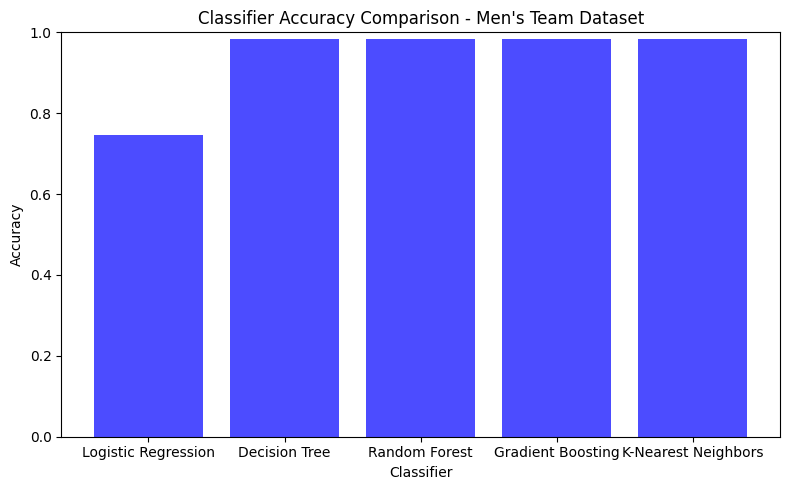

In [ ]:
# Men's Team Dataset
plt.figure(figsize=(8, 5))
plt.bar(classifier_names, men_accuracies, color='blue', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison - Men\'s Team Dataset')
plt.tight_layout()
plt.show()

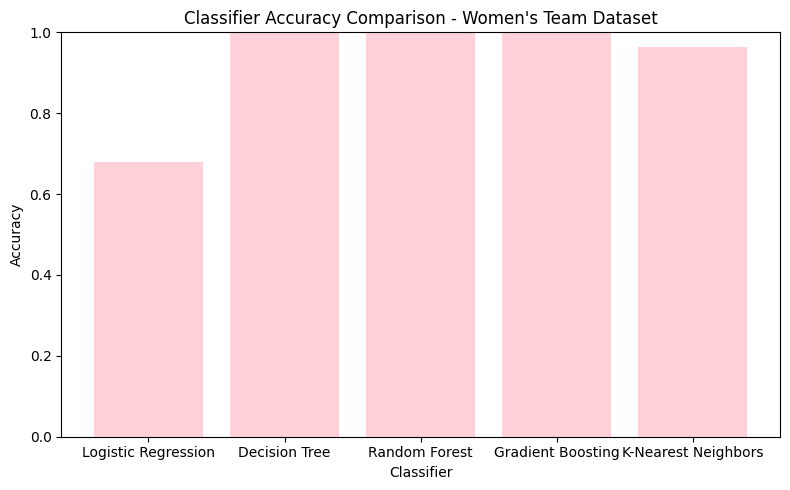

In [ ]:
# Women's Team Dataset
plt.figure(figsize=(8, 5))
plt.bar(classifier_names, women_accuracies, color='pink', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison - Women\'s Team Dataset')
plt.tight_layout()
plt.show()